# Image Classification Project
----
----

## Install Dependencies and Setup
----

In [1]:
import tensorflow as tf 
import os

In [2]:
!pip install opencv-python

In [116]:
# Remove Images that are not in correct format

In [115]:
import cv2
import imghdr

In [4]:
data_dir = 'data'

In [5]:
image_ext = ['jpeg','jpg','png','bmp']

In [6]:
os.listdir(os.path.join(data_dir,'happy faces'))

['-businesspeople-choose-you-for-employment-or-recruitment-illustration-vector.jpg',
 '-in-svg-png-gif-file-formats--group-crowd-smiling-pack-illustrations-6983306.png',
 '-posing-in-vibrant-studio-settings-representing-unity-and-inclusivity-photo.jpeg',
 '05-12-21-happy-people.jpg',
 '1000_F_165246984_Ihe5LVattiq8zEPivcPqrtM85x7noWJw.jpg',
 '1000_F_484873483_hg1ofIdXbMha5lKEDG3hJBrwKh1oikTq.jpg',
 '107307587-1695837909104-gettyimages-1446934118-istock_2022_10_17-ja1-107.jpeg',
 '170404-happy-workers-feature.jpg',
 '23451820-summer-holidays-vacation-happy-people-concept-group-of-friends-jumping-on-the-beach.jpg',
 '25115.jpg',
 '2983960_stock-photo-happy-people.jpg',
 '35438_hd.jpg',
 '360_F_553721043_dud5E2xUoiQaOEfJ4fLGgp7ZuQ7lsWKM.jpg',
 '360_F_582239379_7n6b6kBXogmFRvSz5Ncgr7aQrZBEcO1p.jpg',
 '360_F_709672486_C7eaa5uLXe7qjYwuX0BvPeaUSemlVzpZ.jpg',
 '372579397.jpg',
 '383627315.jpg',
 '4-things-happy-people-dont-do-cover.png',
 '4239f3d51d092f69d529f372a37b4601.jpg',
 '56f455011e000

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
for image_class in os.listdir(data_dir):
    for img in os.listdir(os.path.join(data_dir,image_class)):
        img_path = os.path.join(data_dir,image_class,img)
        try:
            read_img = cv2.imread(img_path)
            tip = imghdr.what(img_path)
            if tip not in image_ext:
                print('Image not in list{}'.format(img_path))
                os.remove(img_path)
        except Exception as e:
            print('Issue with Image {}'.format(img_path))

## Load Data
----

In [9]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 626 files belonging to 2 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

In [12]:
#happy images = 0
#sad images = 1
batch[1]

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1])

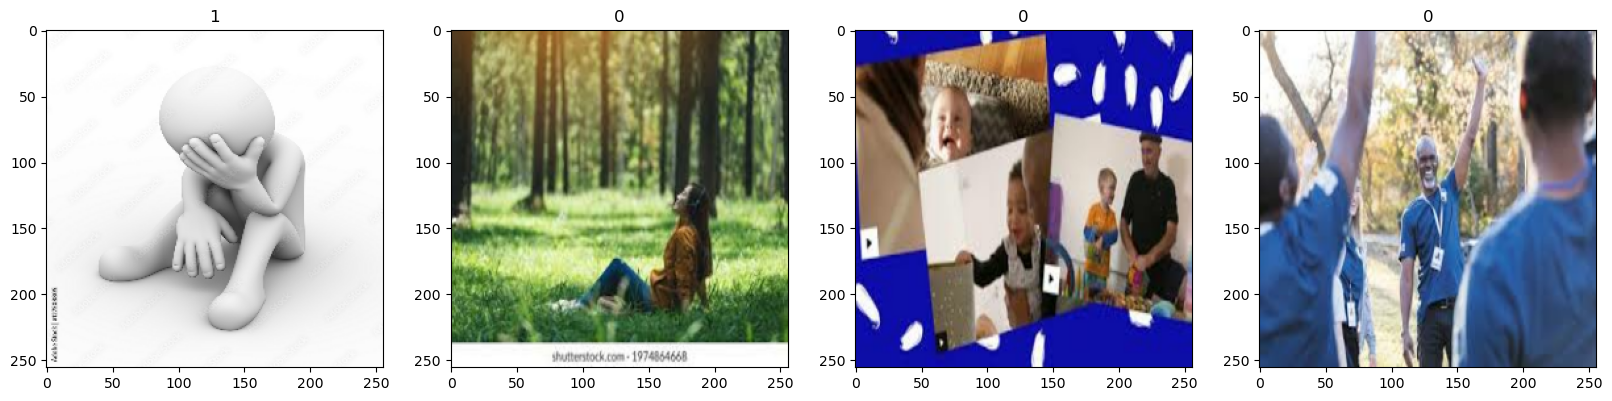

In [13]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Data Preprecessing
----
----

In [14]:
data = data.map(lambda x, y: (x/255, y))

In [15]:
scaled_iterator = data.as_numpy_iterator()

In [16]:
batch = scaled_iterator.next()

In [17]:
batch[0].min()

0.0

In [18]:
batch[0].max()

1.0

In [19]:
len(data)

20

In [20]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [21]:
test_size

2

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [23]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Model Training
-----
----

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [25]:
model = Sequential()

In [26]:
Conv2D??

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export(["keras.layers.Conv2D", "keras.layers.Convolution2D"])
class Conv2D(BaseConv):
    """2D convolution layer.

    This layer creates a convolution kernel that is convolved with the layer
    input over a 2D spatial (or temporal) dimension (height and width) to
    produce a tensor of outputs. If `use_bias` is True, a bias vector is created
    and added to the outputs. Finally, if `activation` is not `None`, it is
    applied to the outputs as well.

    Args:
        filters: int, the dimension of the output space (the number of filters
  

In [27]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\dhali\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
logdir='logs'

In [31]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

## Train Model
----

In [32]:
hist = model.fit(train, epochs=20, validation_data= val, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 26s 923ms/step - accuracy: 0.6178 - loss: 0.7588 - val_accuracy: 0.7500 - val_loss: 0.6085
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 883ms/step - accuracy: 0.7175 - loss: 0.5883 - val_accuracy: 0.7656 - val_loss: 0.5311
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 20s 842ms/step - accuracy: 0.7585 - loss: 0.5233 - val_accuracy: 0.7734 - val_loss: 0.5010
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 703ms/step - accuracy: 0.8110 - loss: 0.4548 - val_accuracy: 0.8047 - val_loss: 0.4085
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 7s 474ms/step - accuracy: 0.8136 - loss: 0.3780 - val_accuracy: 0.7812 - val_loss: 0.4309
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 536ms/step - accuracy: 0.8742 - loss: 0.2747 - val_accuracy: 0.8906 - val_loss: 0.2456
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 387ms/step - accuracy: 0.9281 - loss: 0.1799 - val_accuracy: 0.9375 - val_loss: 0.2429
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 418ms/step - accuracy: 0.9295 - loss: 0.1738 - val_accuracy

## Evaluating Performance
----

In [35]:
history = pd.DataFrame(hist.history)

In [41]:
history.columns

Index(['accuracy', 'loss', 'val_accuracy', 'val_loss'], dtype='object')

Text(0.5, 0.98, 'loss')

<Figure size 640x480 with 0 Axes>

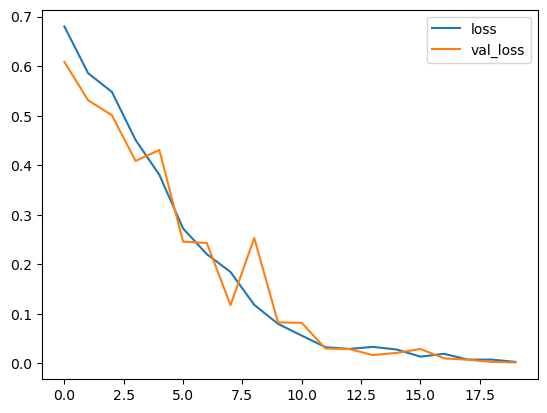

In [40]:
fig = plt.figure()
history[["loss","val_loss"]].plot()
fig.suptitle("loss")

Text(0.5, 0.98, 'accuracy')

<Figure size 640x480 with 0 Axes>

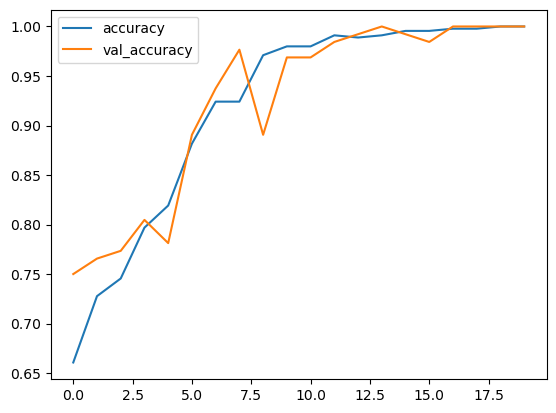

In [42]:
fig = plt.figure()
history[["accuracy","val_accuracy"]].plot()
fig.suptitle("accuracy")

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [45]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


In [47]:
re.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [49]:
pre.result()

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [51]:
print(acc.result())

tf.Tensor(1.0, shape=(), dtype=float32)


# Test

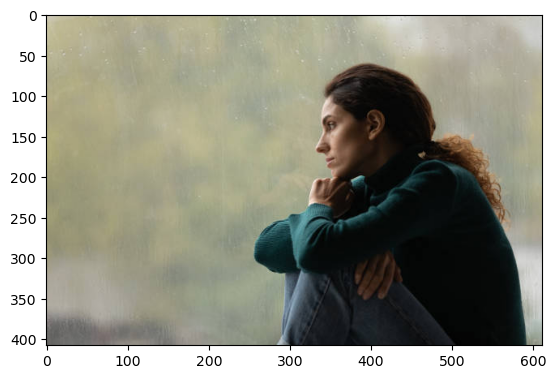

In [112]:
img = cv2.imread('simage4.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

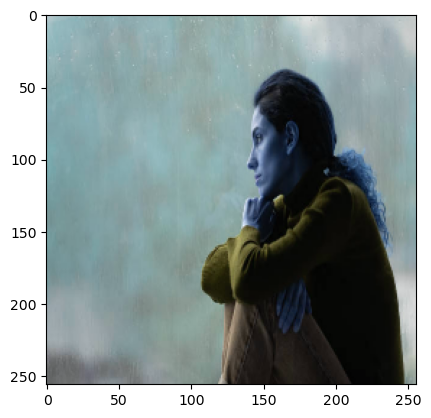

In [105]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [106]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [107]:
if yhat<=0.5:
    print('Happy Image')
elif 0.5<yhat<=1:
    print('Sad Image')

Sad Image


In [108]:
yhat

array([[0.9967356]], dtype=float32)

# Saving Model

In [113]:
from tensorflow.keras.models import load_model

In [114]:
model.save(os.path.join('models','happysadclassifier.h5'))